In [1]:
from PIL import Image
import numpy as np

In [2]:
img_dir = "./img/"
pop_img_grid = Image.open(img_dir + 'pop_grid.bmp')
elv_img_grid = Image.open(img_dir + 'elev_grid.bmp')
pop_img = Image.open(img_dir + 'pop.bmp')
elv_img = Image.open(img_dir + 'elev.bmp')
vld_img_grid = Image.open(img_dir + 'valid_space.bmp')

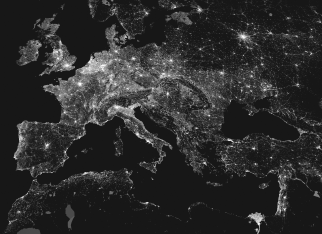

In [5]:
pop_img_grid

In [7]:
pop_img_arr = np.array(pop_img)
pop_img_grid_arr = np.array(pop_img_grid)
elv_img_arr = np.array(elv_img)
elv_img_grid_arr = np.array(elv_img_grid)
vld_img_grid_arr = np.array(vld_img_grid)
print(np.shape(pop_img_arr))
print(np.shape(pop_img_grid_arr))
print(np.shape(elv_img_arr))
print(np.shape(elv_img_grid_arr))
print(np.shape(vld_img_grid_arr))

(3510, 4830, 3)
(234, 322)
(4251, 4901, 3)
(234, 322)
(234, 322)


In [8]:
print(f' pop max: {np.amax(pop_img_grid_arr)}')
print(f' pop min: {np.amin(pop_img_grid_arr)}')
print(f' ele max: {np.amax(elv_img_grid_arr)}')
print(f' ele min: {np.amin(elv_img_grid_arr)}')
print(f' vld max: {np.amax(vld_img_grid_arr)}')
print(f' vld min: {np.amin(vld_img_grid_arr)}')

 pop max: 255
 pop min: 22
 ele max: 57
 ele min: 0
 vld max: 255
 vld min: 0


In [9]:
min_pop_img_val = 23
max_pop_img_val = np.amax(pop_img_grid_arr)
min_elv_img_val = 255
max_elv_img_val = np.amax(elv_img_grid_arr) # 57
min_pop = 0
max_pop = 3000
min_elv = 0
max_elv = 4810 # m (height of the mont blanc)

In [10]:
elevation = []
population = []

for i in range(256):
    
    if i==0: elevation.append(0)
    elif i<52: elevation.append(round(i*1000/51))
    elif i<64: elevation.append(round((i-51)*3800/(64-52) + 1000))
        
    if i<24: population.append(0)
    else: population.append(round((i-23)*3000/(255-23)))

In [11]:
print(len(elevation))
print(len(population))
print(elevation)
print(population)

64
256
[0, 20, 39, 59, 78, 98, 118, 137, 157, 176, 196, 216, 235, 255, 275, 294, 314, 333, 353, 373, 392, 412, 431, 451, 471, 490, 510, 529, 549, 569, 588, 608, 627, 647, 667, 686, 706, 725, 745, 765, 784, 804, 824, 843, 863, 882, 902, 922, 941, 961, 980, 1000, 1317, 1633, 1950, 2267, 2583, 2900, 3217, 3533, 3850, 4167, 4483, 4800]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 26, 39, 52, 65, 78, 91, 103, 116, 129, 142, 155, 168, 181, 194, 207, 220, 233, 246, 259, 272, 284, 297, 310, 323, 336, 349, 362, 375, 388, 401, 414, 427, 440, 453, 466, 478, 491, 504, 517, 530, 543, 556, 569, 582, 595, 608, 621, 634, 647, 659, 672, 685, 698, 711, 724, 737, 750, 763, 776, 789, 802, 815, 828, 841, 853, 866, 879, 892, 905, 918, 931, 944, 957, 970, 983, 996, 1009, 1022, 1034, 1047, 1060, 1073, 1086, 1099, 1112, 1125, 1138, 1151, 1164, 1177, 1190, 1203, 1216, 1228, 1241, 1254, 1267, 1280, 1293, 1306, 1319, 1332, 1345, 1358, 1371, 1384, 1397, 1409, 1422, 1435, 1448, 1461,

In [23]:
for r, row in enumerate(vld_img_grid_arr):
    for c, col in enumerate(row):
        if col == 255: 
            print(f'row: {r}, col: {c}')
# So Brest is in [87, 44]
# So Rize is in [140, 295]

row: 87, col: 44
row: 140, col: 295


In [24]:
# See all values in the image to see widh will be valid moves or not
vals = []
for r, arr in enumerate(vld_img_grid_arr):
    for c, val in enumerate(arr):
        if val not in vals: vals.append(val)
vals # [0, 127, 255] -> [forbidden, inside_country, starting_points]

[0, 127, 255]

In [26]:
# See possible population vals
vals = []
for r, arr in enumerate(pop_img_grid_arr):
    for c, val in enumerate(arr):
        if val not in vals: vals.append(val)

print(len(vals))
print(vals)

231
[23, 32, 28, 40, 91, 81, 72, 77, 61, 42, 51, 39, 36, 47, 25, 83, 93, 95, 111, 74, 24, 112, 131, 52, 26, 29, 37, 22, 68, 54, 53, 66, 35, 48, 34, 33, 27, 46, 30, 50, 31, 38, 57, 45, 64, 86, 67, 59, 43, 63, 96, 99, 100, 115, 116, 41, 82, 65, 69, 76, 49, 56, 55, 108, 107, 121, 58, 98, 44, 78, 84, 62, 80, 73, 71, 114, 94, 75, 103, 117, 104, 60, 90, 70, 120, 147, 102, 133, 109, 92, 182, 126, 122, 101, 140, 160, 124, 85, 89, 118, 127, 105, 216, 220, 110, 88, 113, 176, 143, 123, 154, 178, 130, 136, 149, 244, 156, 87, 141, 192, 191, 195, 79, 137, 97, 132, 150, 148, 106, 128, 217, 199, 125, 152, 119, 179, 129, 138, 155, 145, 162, 186, 135, 161, 153, 188, 168, 146, 158, 165, 142, 134, 144, 170, 206, 218, 208, 190, 171, 193, 169, 251, 243, 212, 198, 177, 181, 196, 245, 237, 202, 159, 205, 189, 213, 163, 151, 157, 180, 139, 175, 172, 194, 214, 173, 203, 226, 225, 183, 185, 222, 242, 197, 167, 174, 166, 184, 232, 240, 254, 209, 200, 236, 227, 187, 201, 204, 241, 230, 207, 210, 211, 233, 164, 221

In [27]:
# See possible elevation vals
vals = []
for r, arr in enumerate(elv_img_grid_arr):
    for c, val in enumerate(arr):
        if val not in vals: vals.append(val)

print(len(vals))
print(vals)

58
[0, 2, 5, 6, 8, 9, 11, 10, 12, 16, 15, 17, 13, 7, 4, 3, 1, 14, 18, 19, 20, 23, 21, 24, 25, 27, 26, 22, 33, 30, 34, 40, 37, 46, 35, 43, 29, 31, 36, 45, 42, 38, 28, 52, 50, 32, 39, 41, 54, 49, 51, 53, 47, 44, 56, 55, 57, 48]


In [32]:
print(elv_img_arr[0])

[[  1 185 253]
 [  1 185 253]
 [  1 185 253]
 ...
 [166 199 137]
 [164 199 136]
 [163 197 135]]
